<center><h1>SPE Ec Workshop Day 1: <b>INTRO TO PYTHON 4 O&G<b>

# 1. Lasio

In [4]:
# Reference: andymcdgeo
# https://github.com/andymcdgeo/Petrophysics-Python-Series/blob/master/07%20-%20Working%20With%20LASIO.ipynb

In [5]:
from google.colab import output

!pip install lasio

import lasio

import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

output.clear()

In [6]:
!wget --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id=1wSJMB7pPZTFZeVQScgulV_tC6Cja7RzL' -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id=1wSJMB7pPZTFZeVQScgulV_tC6Cja7RzL" -O 15-9-19_SR_COMP.LAS && rm -rf /tmp/cookies.txt
!wget --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id=1xvGtsGLc4oXro5uOK-KxyWCOxl1G2gcj' -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id=1xvGtsGLc4oXro5uOK-KxyWCOxl1G2gcj" -O las1.las && rm -rf /tmp/cookies.txt
!wget --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id=1ZAUrtYi9-PIuAZtnKywYVukQoL60Zkyh' -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id=1ZAUrtYi9-PIuAZtnKywYVukQoL60Zkyh" -O log.dlis && rm -rf /tmp/cookies.txt
!wget --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id=130L5fytU85BN51yzLTVB-DmmYLZBs1lB' -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id=130L5fytU85BN51yzLTVB-DmmYLZBs1lB" -O segy1.segy && rm -rf /tmp/cookies.txt
!wget --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id=15zAO3glKk3_MTAprPJyCa0LY2Fza3573' -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id=15zAO3glKk3_MTAprPJyCa0LY2Fza3573" -O e_plotter.py && rm -rf /tmp/cookies.txt

output.clear()

In [7]:
log = lasio.read('15-9-19_SR_COMP.LAS')
las1 = lasio.read('las1.las')

In [8]:
log.well

[HeaderItem(mnemonic="STRT", unit="M", value="102.1568", descr="Top Depth"),
 HeaderItem(mnemonic="STOP", unit="M", value="4636.514", descr="Bottom Depth"),
 HeaderItem(mnemonic="STEP", unit="M", value="0.1524", descr="Depth Increment"),
 HeaderItem(mnemonic="NULL", unit="", value="-999.25", descr="Null Value"),
 HeaderItem(mnemonic="FLD", unit="", value="Q15", descr="Field Name"),
 HeaderItem(mnemonic="WELL", unit="", value="15/9-19", descr="NAME"),
 HeaderItem(mnemonic="WBN", unit="", value="15/9-19 SR", descr="WELLBORE"),
 HeaderItem(mnemonic="NATI", unit="", value="NOR", descr="COUNTRY"),
 HeaderItem(mnemonic="CTRY", unit="", value="NOR", descr="COUNTRY"),
 HeaderItem(mnemonic="COMP", unit="", value="STATOIL", descr="OPERATOR"),
 HeaderItem(mnemonic="PDAT", unit="", value="MSL", descr="PERM DATUM"),
 HeaderItem(mnemonic="COUN", unit="", value="NORTH SEA", descr="RIG NAME"),
 HeaderItem(mnemonic="STAT", unit="", value="NORWAY", descr="STATE"),
 HeaderItem(mnemonic="PBWE", unit="", v

In [9]:
log.keys()

['DEPT', 'AC', 'CALI', 'DEN', 'GR', 'NEU', 'RDEP', 'RMED']

In [10]:
log.df()

,AC,CALI,DEN,GR,NEU,RDEP,RMED
DEPT,,,,,,,
102.1568,NaN,NaN,NaN,5.3274,NaN,NaN,NaN
102.3092,NaN,NaN,NaN,5.8235,NaN,NaN,NaN
102.4616,NaN,NaN,NaN,6.5228,NaN,NaN,NaN
102.6140,NaN,NaN,NaN,7.2285,NaN,NaN,NaN
102.7664,NaN,NaN,NaN,9.5020,NaN,NaN,NaN
...,...,...,...,...,...,...,...
4635.9044,NaN,NaN,NaN,NaN,NaN,0.7729,0.5978
4636.0568,NaN,NaN,NaN,NaN,NaN,0.8369,0.6257
4636.2092,NaN,NaN,NaN,NaN,NaN,0.8741,0.6888


In [42]:
log.curves

[CurveItem(mnemonic="DEPT", unit="M", value="00 001 00 00", descr="1  DEPTH", original_mnemonic="DEPT", data.shape=(29754,)),
 CurveItem(mnemonic="AC", unit="US/F", value="", descr="2  Sonic Transit Time (Slowness)", original_mnemonic="AC", data.shape=(29754,)),
 CurveItem(mnemonic="CALI", unit="IN", value="", descr="3  Caliper", original_mnemonic="CALI", data.shape=(29754,)),
 CurveItem(mnemonic="DEN", unit="G/CC", value="", descr="4  Bulk Density", original_mnemonic="DEN", data.shape=(29754,)),
 CurveItem(mnemonic="GR", unit="GAPI", value="", descr="5  Gamma Ray", original_mnemonic="GR", data.shape=(29754,)),
 CurveItem(mnemonic="NEU", unit="%", value="", descr="6  Neutron Porosity", original_mnemonic="NEU", data.shape=(29754,)),
 CurveItem(mnemonic="RDEP", unit="OHMM", value="", descr="7  Deep Resistivity", original_mnemonic="RDEP", data.shape=(29754,)),
 CurveItem(mnemonic="RMED", unit="OHMM", value="", descr="8  Medium Resistivity", original_mnemonic="RMED", data.shape=(29754,))]

In [11]:
log.curves[4]

CurveItem(mnemonic="GR", unit="GAPI", value="", descr="5  Gamma Ray", original_mnemonic="GR", data.shape=(29754,))

In [12]:
class reader:

  def __init__(self,log):
    self.log = log

  def df(self):
    return self.log.df().reset_index()

  def detail(self):
    curves = self.log.curves 

    mnemonic,description,units = [],[],[]

    for i in range(0,len(curves)):
      mnemonic.append(curves[i]['mnemonic'])
      description.append(curves[i]['descr'])
      units.append(curves[i]['unit'])    
    return pd.DataFrame([mnemonic,description,units]).T.rename(columns={0:'Feature',1:'Description',2:'Unit'})

  def nulls(self):
    df = self.log.df()
    nans = df.isna().sum()
    percentage = [np.round(100*i/len(df),2) for i in nans]
    return pd.DataFrame([df.columns.values,percentage]).T.rename(columns={0:'Features',1:'%NaN'})

In [13]:
reader(log).detail()

,Feature,Description,Unit
0,DEPT,1 DEPTH,M
1,AC,2 Sonic Transit Time (Slowness),US/F
2,CALI,3 Caliper,IN
3,DEN,4 Bulk Density,G/CC
4,GR,5 Gamma Ray,GAPI
5,NEU,6 Neutron Porosity,%
6,RDEP,7 Deep Resistivity,OHMM
7,RMED,8 Medium Resistivity,OHMM


In [14]:
reader(log).df()

,DEPT,AC,CALI,DEN,GR,NEU,RDEP,RMED
0,102.1568,NaN,NaN,NaN,5.3274,NaN,NaN,NaN
1,102.3092,NaN,NaN,NaN,5.8235,NaN,NaN,NaN
2,102.4616,NaN,NaN,NaN,6.5228,NaN,NaN,NaN
3,102.6140,NaN,NaN,NaN,7.2285,NaN,NaN,NaN
4,102.7664,NaN,NaN,NaN,9.5020,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
29749,4635.9044,NaN,NaN,NaN,NaN,NaN,0.7729,0.5978
29750,4636.0568,NaN,NaN,NaN,NaN,NaN,0.8369,0.6257
29751,4636.2092,NaN,NaN,NaN,NaN,NaN,0.8741,0.6888
29752,4636.3616,NaN,NaN,NaN,NaN,NaN,0.9002,0.8902


In [15]:
reader(log).nulls()

,Features,%NaN
0,AC,76.45
1,CALI,76.45
2,DEN,76.19
3,GR,5.5
4,NEU,76.15
5,RDEP,58.92
6,RMED,58.92


In [16]:
df = reader(log).df()
match = df.loc[df['AC'].notnull()].reset_index().drop('index',axis=1)
match.isna().sum()

DEPT     0
AC       0
CALI     0
DEN      0
GR       0
NEU      0
RDEP    56
RMED    56
dtype: int64

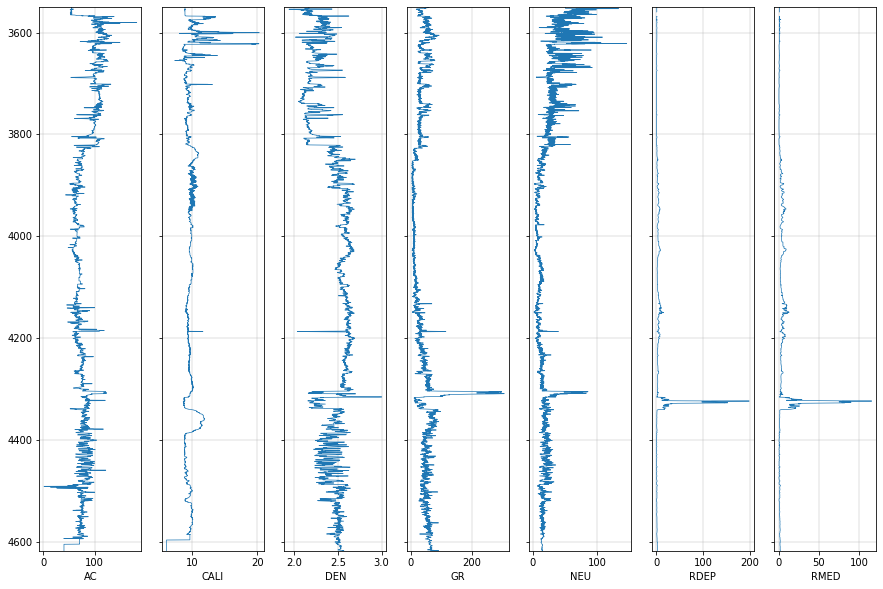

In [17]:
params = match.keys().drop('DEPT')
fig,ax = plt.subplots(nrows=1,ncols=len(params), figsize=(15,10))

for i in range(0,len(params)):

  ax[i].plot(match[params[i]],match.DEPT,lw=0.7)
  ax[i].set_ylim(match.DEPT.min(),match.DEPT.max())
  ax[i].invert_yaxis()  
  ax[i].grid(True,linewidth=0.4)
  ax[i].set_xlabel(match[params[i]].name)
  if i+1 < len(params):
    ax[i+1].set_yticklabels([])

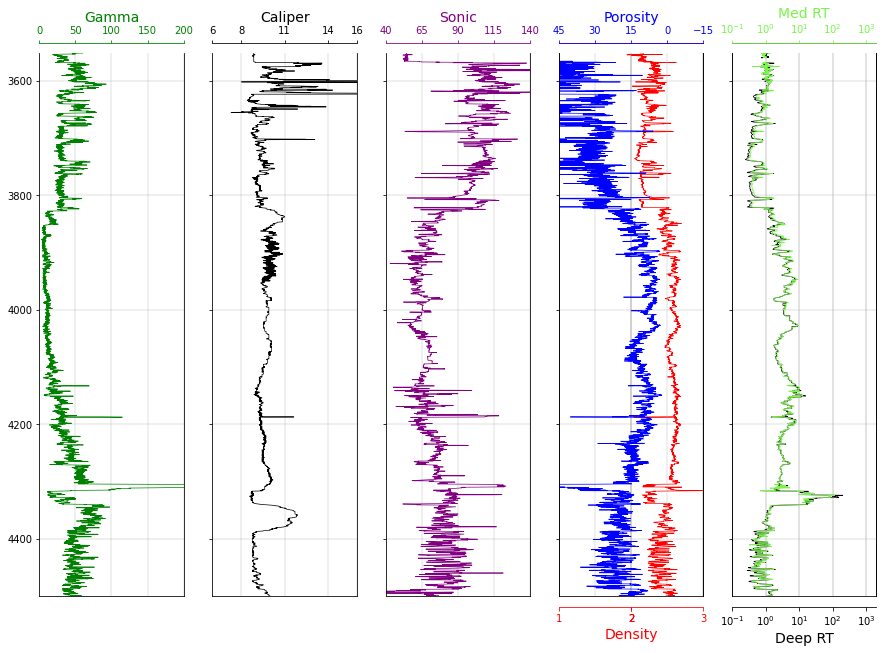

In [18]:
from e_plotter import log_view

log_view(match)

# 2. Dlisio

In [19]:
# Reference: andymcdgeo
# https://github.com/andymcdgeo/Petrophysics-Python-Series/blob/master/17%20-%20Loading%20DLIS%20Data.ipynb

In [20]:
!pip install dlisio

import dlisio
output.clear()

In [21]:
from dlisio import dlis

f, *f_tail = dlis.load('log.dlis') # Read Logical Files
len(f_tail)

0

In [22]:
origin, *origin_tail = f.origins # Read Origin File 
len(origin_tail)

0

In [23]:
f.describe()

------------
Logical File
------------
Description : LogicalFile(FMS_DSI_138PUP)
Frames      : 4
Channels    : 484

Known objects
--
EQUIPMENT               : 27
PARAMETER               : 480
AXIS                    : 50
TOOL                    : 5
CALIBRATION             : 341
ORIGIN                  : 1
CHANNEL                 : 484
CALIBRATION-MEASUREMENT : 22
CALIBRATION-COEFFICIENT : 12
FRAME                   : 4
PROCESS                 : 3
FILE-HEADER             : 1

Unknown objects
--
440-CHANNEL                  : 538
440-OP-CHANNEL               : 573
440-PRESENTATION-DESCRIPTION : 1


In [24]:
origin.describe()

------
Origin
------
name   : DLIS_DEFINING_ORIGIN
origin : 41
copy   : 0

Logical file ID          : FMS_DSI_138PUP
File set name and number : WINTERSHALL/L5-9 / 41
File number and type     : 170 / PLAYBACK

Field                   : L5
Well (id/name)          :  / L5-9
Produced by (code/name) : 440 / Schlumberger
Produced for            : Wintershall Noordzee B.V.
Run number              : -1
Descent number          : -1
Created                 : 2002-02-17 18:18:52

Created by              : OP, (version: 9C2-303)
Other programs/services : MESTB: Micro Electrical Scanner - B (Slim)  SGTL:
                          Scintillation Gamma-Ray - L           DTAA: Downhole
                          Toolbus Adapter - A          DSSTB: Dipole Shear
                          Imager - B              DTCA: DTS Telemetry Cartridge
                          ACTS: Auxiliary Compression Tension Sub - B DIP: Dip
                          Computation                        DIR: Directional
          

In [25]:
a = {0:'a',1:'b',2:'c'}

for items,cont in a.items():
  print(items)

0
1
2


In [26]:
# Define a function to extract data

def describer(objts, **kwargs):

  summary = []

  for att,contect in kwargs.items():
    columns = []
    for obj in objts:
      try:
        value = getattr(obj,att)
      except:
        value = 'Fail'
      
      columns.append(value)
    summary.append(columns)
  
  summary = pd.DataFrame(summary).T
  summary.columns = kwargs.values()

  return summary

In [27]:
# Extract Parameters
pd.set_option('max_rows',500)
parameters = describer(f.parameters, name='Name', long_name='Long Name', values='Value(s)')
parameters

,Name,Long Name,Value(s)
0,ALTDPCHAN,Name of alternate depth channel,[SPEEDCORRECTEDDEPTH]
1,SCD_ACCEL,Accelerometer driving Speed Corrected Depth,[GPIT]
2,MMDU,Magnetic Mark Depth Units,[FEET]
3,TD,Total Depth,[4825.0]
4,RIGTYP,Rig Type,[ ]
5,LOGSEQ,Log Sequence,[FIRST_LOG_IN_WELL]
6,CONTYP,Conveyance Type,[WIRELINE]
7,TNDTYP,Tension Device,[CMTD-B/A]
8,IDWLCN,IDW Calibration Cable Type,[7-46P]
9,ZRCS,Tool Zero Reference Check at Surface,[]


In [28]:
# Select specific parameters
pd.set_option('max_colwidth',200)
parameters.loc[parameters['Name'].isin(['CN','WN','LATI','LONG','BS','FN','NATI'])]

,Name,Long Name,Value(s)
355,BS,Bit Size,[5.75]
430,NATI,Nation,[Netherlands ]
434,LONG,Longitude,"[04 36' 12.526"" ]"
435,LATI,Latitude,"[53 42' 18.113"" ]"
445,FN,Field Name,[L5 ]
446,WN,Well Name,[L5-9 ]
448,CN,Company Name,[Wintershall Noordzee B.V. ]


In [29]:
# Extract Channels
channels = describer(f.channels, name='Name', long_name='Long_name', units='units', dimesion='dimension',frame='frame')
channels

,Name,Long_name,units,dimension,frame
0,TDEP,6-Inch Frame Depth,0.1 in,Fail,Frame(60B)
1,TDEP,2-Inch Frame Depth,0.1 in,Fail,None
2,TDEP,1-Inch Frame Depth,0.1 in,Fail,Frame(10B)
3,TDEP,0.1 Inch River Depth Index,0.1 in,Fail,Frame(1B)
4,TDEP,1.5 Inch River Depth Index,0.1 in,Fail,Frame(15B)
5,TDEP,1.5 inch River Depth,0.1 in,Fail,None
6,TDEP,0.1 inch River Depth,0.1 in,Fail,None
7,TDEP,SGT-L River Depth,0.1 in,Fail,None
8,TDEP,HiRes Depth River Depth Index,0.1 in,Fail,None
9,TDEP,STEP RIVER DEPTH INDEX,0.1 in,Fail,None


In [30]:
# Find channels by Name
channels[channels['Name'].str.contains('TDEP')]

,Name,Long_name,units,dimension,frame
0,TDEP,6-Inch Frame Depth,0.1 in,Fail,Frame(60B)
1,TDEP,2-Inch Frame Depth,0.1 in,Fail,None
2,TDEP,1-Inch Frame Depth,0.1 in,Fail,Frame(10B)
3,TDEP,0.1 Inch River Depth Index,0.1 in,Fail,Frame(1B)
4,TDEP,1.5 Inch River Depth Index,0.1 in,Fail,Frame(15B)
5,TDEP,1.5 inch River Depth,0.1 in,Fail,None
6,TDEP,0.1 inch River Depth,0.1 in,Fail,None
7,TDEP,SGT-L River Depth,0.1 in,Fail,None
8,TDEP,HiRes Depth River Depth Index,0.1 in,Fail,None
9,TDEP,STEP RIVER DEPTH INDEX,0.1 in,Fail,None


In [31]:
# frame column has objects so we have to change them to strings in order to use pandas methods
channels['frame'] = channels['frame'].astype('str')
channels['frame'].value_counts()

None          307
Frame(1B)      84
Frame(60B)     77
Frame(15B)     12
Frame(10B)      4
Name: frame, dtype: int64

In [32]:
# Group Channels by Units in to classify them and merge with the corresponding frame
pd.concat([pd.DataFrame(channels.groupby(by='units')['Name'].unique()),pd.DataFrame(channels.groupby(by='units')['frame'].unique())],axis=1)


,Name,frame
units,,
,"[MSW1, MSW2, PWFX, PWNX, PFTX, PFVX, PFCX, PFNX, PTCX, PTNX, PWF1, PWN1, PWF2, PWN2, PWF3, PWN3, PWF4, PWN4, PFT5, PFV5, PFC5, PFN5, PTC5, PTN5, BI, BILI, U-SONIC_BI_PIPS_DATA_CHANNEL, WFX, WFGX, ...","[Frame(60B), None, Frame(1B), Frame(15B)]"
%,[DCD_STANDOFF],[None]
0.1 in,"[TDEP, IDWD, SCD]","[Frame(60B), None, Frame(10B), Frame(1B), Frame(15B)]"
1000 kPa.s/m,[DCD_PIS],[None]
A/m,"[FNOR, FX, FY, FZ, FNOR_SL, FX_SL, FY_SL, FZ_SL]","[Frame(60B), Frame(15B), None]"
Hz,"[MAXSPX, MAXSP1, MAXSP2, MAXSP3, MAXSP4]",[None]
N,"[DF, CDF]",[Frame(60B)]
V,"[EV, GADZ_SL, GPV_SL, GNV_SL]","[Frame(1B), None]"
dB,"[E1R1, E2R1, SNR1, E1T1, E2T1, SNT1, E1T2, E2T2, SNT2, E1R3, E2R3, SNR3, E1T3, E2T3, SNT3, ENR1, EER1, ENT1, EET1, ENT2, EET2, ENR3, EER3, ENT3, EET3, PWFXSPDB, PWF1SPDB, PWF2SPDB, PWF3SPDB, PWF4S...",[None]


In [41]:
# Select frame to extract Data
print(f.frames)
frame1 = f.frames[0]
print('Selected Frame: ',frame1)

[Frame(60B), Frame(10B), Frame(1B), Frame(15B)]
Selected Frame:  Frame(60B)


In [34]:
# Define a function to get values from channels

def get_info(frame,name):
  [channel] = [i for i in frame.channels if i.name == name]
  return channel

In [35]:
# Get Curves
gr = get_info(frame1,'GR').curves()
dts = get_info(frame1,'DTSM').curves()
dtc = get_info(frame1,'DTCO').curves()
phi = get_info(frame1, 'SPHI').curves()
td = get_info(frame1,'TDEP').curves()*0.00254

In [38]:
# Define Dataframe
dlis_df = pd.DataFrame([td,gr,phi,dtc,dts]).T
dlis_df.columns = ['DEPT','GR','SPHI','DTCO','DTSM']
dlis_df = dlis_df.sort_values(by='DEPT').reset_index().drop('index',axis=1)
dlis_df

,DEPT,GR,SPHI,DTCO,DTSM
0,4574.438477,84.258720,-0.001466,55.868965,139.111099
1,4574.590820,84.258720,-0.001466,55.868965,139.111099
2,4574.743164,86.337410,-0.001466,55.868965,139.111099
3,4574.895508,87.955223,-0.001466,55.868965,139.111099
4,4575.047852,87.066444,-0.001466,55.868965,139.111099
...,...,...,...,...,...
1601,4818.430664,101.615440,0.081871,64.441422,112.039284
1602,4818.583008,101.615440,0.081871,64.441422,112.039284
1603,4818.735840,101.615440,0.081871,64.441422,112.039284
1604,4818.888184,101.615440,0.081871,64.441422,112.039284


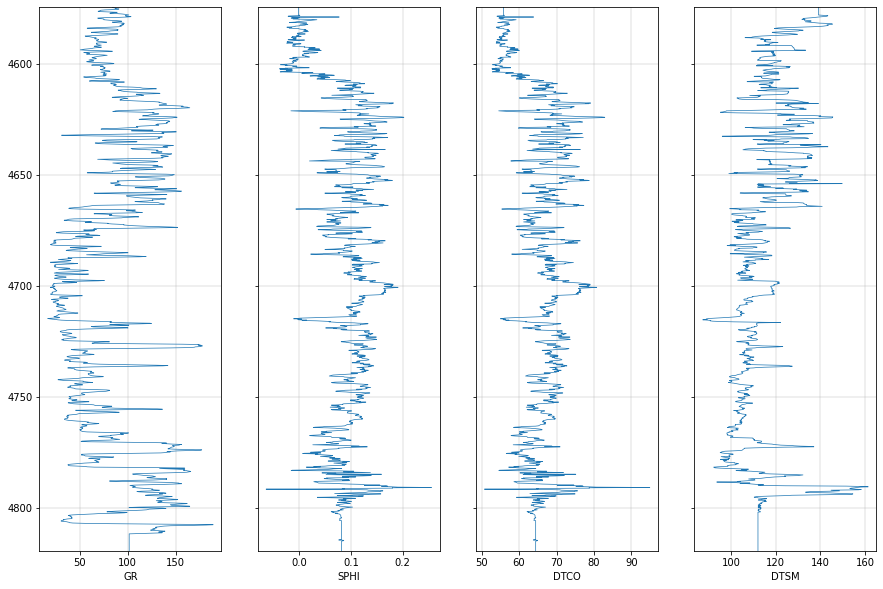

In [39]:
# Plot Curves
params = dlis_df.keys().drop('DEPT')
fig,ax = plt.subplots(nrows=1,ncols=len(params), figsize=(15,10))

for i in range(0,len(params)):

  ax[i].plot(dlis_df[params[i]],dlis_df.DEPT,lw=0.7)
  ax[i].set_ylim(dlis_df.DEPT.min(),dlis_df.DEPT.max())
  ax[i].invert_yaxis()  
  ax[i].grid(True,linewidth=0.4)
  ax[i].set_xlabel(dlis_df[params[i]].name)
  if i+1 < len(params):
    ax[i+1].set_yticklabels([])

# 3. SEGYIO

In [ ]:
# Reference: Software Underground
# https://www.youtube.com/watch?v=iIOMiN8Cacs&t=6s

In [ ]:
!pip install segyio
import segyio
output.clear()

In [ ]:
with segyio.open('segy1.segy') as seismic: # open seismic file
  cube = segyio.cube(seismic) # define 3D seismic Cube

In [ ]:
type(cube)

numpy.ndarray

In [ ]:
cube.shape #inline x-line time_slices   

(601, 481, 251)

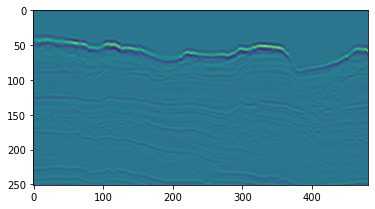

In [ ]:
plt.imshow(cube[300,:,:].T); #Plot inline

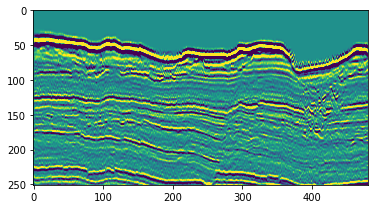

In [ ]:
amplitude_lim = np.percentile(cube,95) # Define amplitude
plt.imshow(cube[300,:,:].T, vmin=-amplitude_lim, vmax=amplitude_lim);

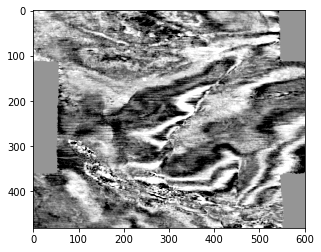

In [ ]:
amplitude_lim = np.percentile(cube,95) # Plot Time slice and change colormap
plt.imshow(cube[:,:,150].T, vmin=-amplitude_lim, vmax=amplitude_lim, cmap='Greys');